In [1]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

# 1. 데이터 확인

In [2]:
#MNIST dataset

train_dset = datasets.MNIST('../data', train=True, download=True,transform=transforms.ToTensor())
test_dset = datasets.MNIST('../data', train=False,transform=transforms.ToTensor(), download=True)

print('number of training data: ', len(train_dset))
print('number of test data ', len(test_dset))

number of training data:  60000
number of test data  10000


Image
Shape of image	:  torch.Size([1, 28, 28])
10'th row of this image	: tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.2000, 0.9333, 0.9922, 0.9922, 0.7451, 0.4471, 0.9922, 0.8941,
        0.1843, 0.3098, 1.0000, 0.6588, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000])
Label
label:  0


<function matplotlib.pyplot.show(close=None, block=None)>

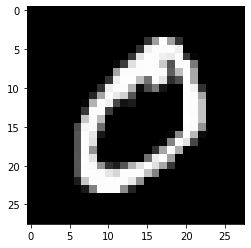

In [3]:
#데이터 확인

"""

TODO: train_dset[*] 의 숫자값을 바꾸어 데이터를 다른 걸 출력해보자.

"""
image, label = train_dset[1]

print('Image')
print('=========================================')
print('Shape of image\t: ', image.shape)
print('10\'th row of this image\t:', image[0][9])

print('Label')
print('=========================================')
print('label: ', label)

from matplotlib import pyplot as plt
plt.imshow(image.squeeze().numpy(), cmap='gray')
plt.show

In [4]:
train_dset[1]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

## 1. Training and Test

In [5]:
"""
TODO: batch_size 를 바꾸어보자
"""
train_loader = torch.utils.data.DataLoader(train_dset, batch_size = 32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dset, batch_size = 32, shuffle=False)

In [6]:
#Training
def train(model, train_loader, optimizer, i_epoch, device):
    model.train()
    for i, (image, target) in enumerate(train_loader):
        image = image.to(device)
        output = model(image)
        loss = F.cross_entropy(output, target)

        model.zero_grad()
        loss.backward()
        optimizer.step()


         #러닝 커브 그리기
        loss_value.append(loss.detach().numpy())

        #100번쨰 마다 loss 출력
        if i%100==0:
            print("epoch: {}, iteration: {}, loss: {}".format(i_epoch, i, loss.item()))

In [7]:
#Test
def test(model, test_loader, i_epoch, device):
    model.eval()
    accurate = 0
    test_loss = 0

    with torch.no_grad():
        for i, (image, target) in enumerate(test_loader):
            image = image.to(device)
            output = model(image)
            test_loss += F.nll_loss(output, target, reduction='sum').item()
            prediction = torch.argmax(output, dim=1)
            accurate += prediction.eq(target.view_as(prediction)).sum().item()


    accuracy = accurate / len(test_loader.dataset)
    #러닝커브 그리기
    accuracy_value.append(accuracy)
    print("epoch: {}, accuracy: {}".format(i_epoch, accuracy))

## 2. Model

In [11]:
"""
TODO: 모델 Customization! 레이어 개수나 레이어 차원, 활성화 함수를 바꾸어보자.

데이터의 형태를 주의하면서 바꾸어 볼 것~

"""

class net(nn.Module):
    def __init__(self):
        super(net, self).__init__()

        self.fc = nn.Sequential(
            nn.Linear(28 * 28, 1024),
            nn.ReLU(),
            nn.Linear(1024, 1024),
            nn.ReLU(),
            nn.Linear(1024, 1024),
            nn.ReLU(),
            nn.Linear(1024, 1024),
            nn.ReLU(),
            nn.Linear(1024, 10),
            nn.Sigmoid()
           )

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        return self.fc(x)

## 3. Evaluation

In [12]:
loss_value = []
accuracy_value = []
model = net()

"""

TODO: 학습률을 바꾸어보고, Optimizer 을 바꾸어보자 (선택)

"""
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [13]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

"""
TODO: 학습횟수를 자유자재로 바꾸어보자.
"""

for i_epoch in range(15):
    train(model, train_loader, optimizer, i_epoch, device)
    test(model, test_loader, i_epoch, device)
    torch.save(model.state_dict(), "mnist_test.pt")

"""
 print('=========================================')
    print("Model's state_dict for epoch :", i_epoch)
    for param_tensor in model.state_dict():
     print(param_tensor, "\t", model.state_dict()[param_tensor].size())

    print("Optimizer's state_dict:")
     for var_name in optimizer.state_dict():
      print(var_name, "\t", optimizer.state_dict()[var_name])

    print('=========================================')
"""

epoch: 0, iteration: 0, loss: 2.3021528720855713
epoch: 0, iteration: 100, loss: 1.7438052892684937
epoch: 0, iteration: 200, loss: 1.5901821851730347
epoch: 0, iteration: 300, loss: 1.6566953659057617
epoch: 0, iteration: 400, loss: 1.5991467237472534
epoch: 0, iteration: 500, loss: 1.5293586254119873
epoch: 0, iteration: 600, loss: 1.5694481134414673
epoch: 0, iteration: 700, loss: 1.562568187713623
epoch: 0, iteration: 800, loss: 1.5003293752670288
epoch: 0, iteration: 900, loss: 1.500967264175415
epoch: 0, iteration: 1000, loss: 1.4973119497299194
epoch: 0, iteration: 1100, loss: 1.578936219215393
epoch: 0, iteration: 1200, loss: 1.5156521797180176
epoch: 0, iteration: 1300, loss: 1.471638560295105
epoch: 0, iteration: 1400, loss: 1.4973357915878296
epoch: 0, iteration: 1500, loss: 1.4772652387619019
epoch: 0, iteration: 1600, loss: 1.4979816675186157
epoch: 0, iteration: 1700, loss: 1.505540370941162
epoch: 0, iteration: 1800, loss: 1.4716228246688843
epoch: 0, accuracy: 0.9436
ep

epoch: 8, iteration: 500, loss: 1.4649547338485718
epoch: 8, iteration: 600, loss: 1.4690330028533936
epoch: 8, iteration: 700, loss: 1.4611504077911377
epoch: 8, iteration: 800, loss: 1.468385100364685
epoch: 8, iteration: 900, loss: 1.4611501693725586
epoch: 8, iteration: 1000, loss: 1.461182713508606
epoch: 8, iteration: 1100, loss: 1.4652822017669678
epoch: 8, iteration: 1200, loss: 1.4949743747711182
epoch: 8, iteration: 1300, loss: 1.4613717794418335
epoch: 8, iteration: 1400, loss: 1.4655240774154663
epoch: 8, iteration: 1500, loss: 1.4614289999008179
epoch: 8, iteration: 1600, loss: 1.4611597061157227
epoch: 8, iteration: 1700, loss: 1.4674769639968872
epoch: 8, iteration: 1800, loss: 1.4614176750183105
epoch: 8, accuracy: 0.9801
epoch: 9, iteration: 0, loss: 1.46126127243042
epoch: 9, iteration: 100, loss: 1.461211919784546
epoch: 9, iteration: 200, loss: 1.4611506462097168
epoch: 9, iteration: 300, loss: 1.4611577987670898
epoch: 9, iteration: 400, loss: 1.4611518383026123
ep

'\n print(\'=========================================\')\n    print("Model\'s state_dict for epoch :", i_epoch)\n    for param_tensor in model.state_dict():\n     print(param_tensor, "\t", model.state_dict()[param_tensor].size())\n\n    print("Optimizer\'s state_dict:")\n     for var_name in optimizer.state_dict():\n      print(var_name, "\t", optimizer.state_dict()[var_name])\n\n    print(\'=========================================\')\n'

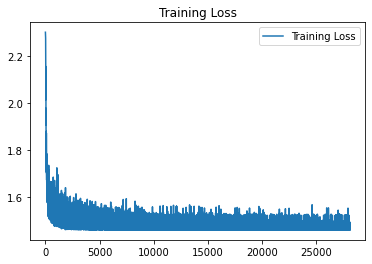

In [14]:
#그래프 확인
plt.plot(loss_value, label='Training Loss')

plt.title('Training Loss')
plt.legend()

Text(0.5, 0, 'Epoch')

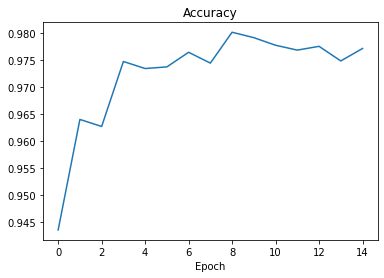

In [15]:
plt.plot(accuracy_value, label='Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')